# COMPREHENSIVE AIRPLANE DATA ANALYSIS.

## Context
Airline data holds immense importance as it offers insights into the functioning and efficiency of the aviation industry. It provides valuable information about flight routes, schedules, passenger demographics, and preferences, which airlines can leverage to optimize their operations and enhance customer experiences. By analyzing data on delays, cancellations, and on-time performance, airlines can identify trends and implement strategies to improve punctuality and mitigate disruptions. Moreover, regulatory bodies and policymakers rely on this data to ensure safety standards, enforce regulations, and make informed decisions regarding aviation policies. Researchers and analysts use airline data to study market trends, assess environmental impacts, and develop strategies for sustainable growth within the industry. In essence, airline data serves as a foundation for informed decision-making, operational efficiency, and the overall advancement of the aviation sector.

## Content
This dataset comprises diverse parameters relating to airline operations on a global scale. The dataset prominently incorporates fields such as Passenger ID, First Name, Last Name, Gender, Age, Nationality, Airport Name, Airport Country Code, Country Name, Airport Continent, Continents, Departure Date, Arrival Airport, Pilot Name, and Flight Status. These columns collectively provide comprehensive insights into passenger demographics, travel details, flight routes, crew information, and flight statuses. Researchers and industry experts can leverage this dataset to analyze trends in passenger behavior, optimize travel experiences, evaluate pilot performance, and enhance overall flight operations.

## Objective
I will delve into the finer details of the airplane data to uncover hidden patterns and meaningful insights that will help in making informed data-driven decisions and policy formulation so as to improve efficiency and effectivness of operations and safety in the airline industry.

### 1. LOAD LIBRARIES & DATA.

In [1]:
!pip install wordcloud

In [2]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#load data
df = pd.read_csv("airplane_dataset.csv")
df.tail(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98609,fzGKSb,Olimpia,Arstall,Female,22,China,Wuzhou Changzhoudao Airport,CN,China,AS,Asia,4/23/2022,WUZ,Hansiain Segot,On Time
98610,Wahnk2,Che,Pressland,Male,83,France,Warangal Airport,IN,India,AS,Asia,8/5/2022,WGC,Moishe Ong,Cancelled
98611,0mBUjN,Hadria,Vacher,Female,41,Canada,Ipil Airport,PH,Philippines,AS,Asia,6/6/2022,IPE,Gideon Praundl,On Time
98612,Hm8PVQ,Ody,Tineman,Male,82,Indonesia,Five Mile Airport,US,United States,NAM,North America,3/17/2022,FMC,Truman Philbrook,Delayed
98613,XqX0PI,Oneida,Ossipenko,Female,47,Serbia,Arugam Bay SPB,LK,Sri Lanka,AS,Asia,5/12/2022,AYY,Guido Cloy,Delayed
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Auguste Tindley,Delayed


In [3]:
#data dimension
df.shape

(98619, 15)

In [4]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

### Notes;
a. The spaces in the column names need to be replaced with an underscore.

b. The data  type in 'Depature date' is incorrect and needs to be changed to datetime.

### 2. DATA CLEANSING & PRE-PROCESSING.
The dataset will be assessed to identify existance of two types of issues;

        i. Dirty data (data quality issues/content issues) such as missing data, duplicates and incorrect data
        
        ii. Untidy/Messy data (structural issues i.e colums, rows of the data

In [5]:
#check for missing values
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check for incorrect data
df.Age.min()

1

In [8]:
df.Age.max()

90

In [9]:
#summary statistics
df.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


### Notes;
There are no issues with the data, we proceed to the next step which is EDA.

### 3.EXPLORATORY DATA ANALYSIS (EDA)

**i. PASSANGER DEMOGRAPHICS**

#### Q. What is the Gender of passengers who boarded flights.

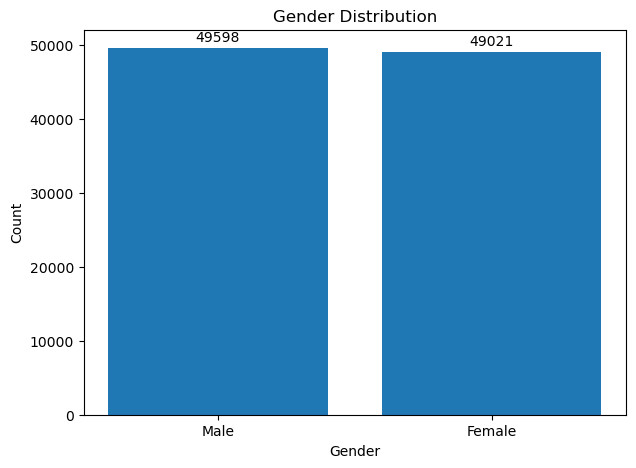

In [10]:
gender_counts = df['Gender'].value_counts()

#plot a bar chart
plt.figure(figsize=(7,5))
bars = plt.bar(gender_counts.index, gender_counts.values)

#display values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### Q. What is the distribution of passangers' age.

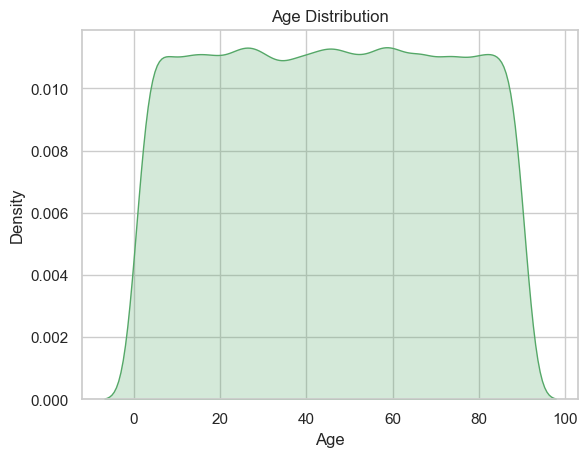

In [11]:
#kde plot 
sns.set(style='whitegrid')
sns.kdeplot(data=df['Age'], shade=True, color='g')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution');

### Notes;
a. The ratio of male to female passengers is almost equal.

b. Majoring of passengers who boarded the flights were between the age of 7 years to 84 years.

#### Q. Which are the most popular nationalities of passenger flights?

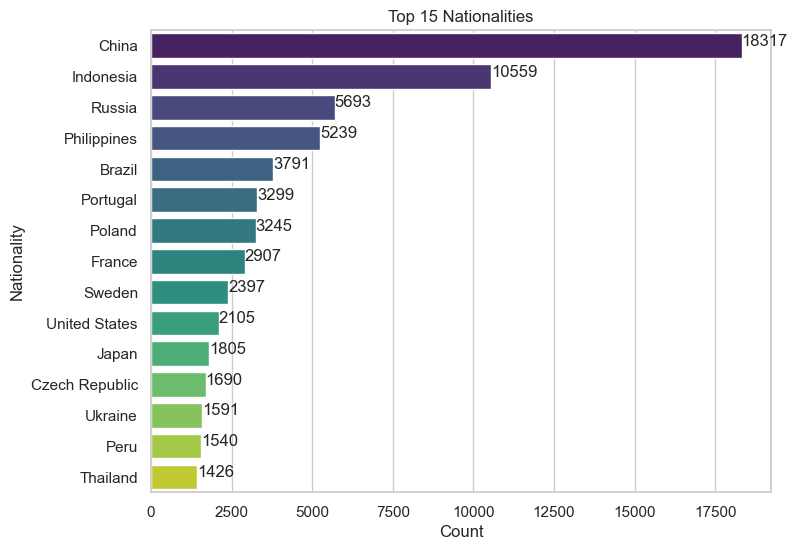

In [12]:
#compute to 15 nationalities
top_nationalities = df['Nationality'].value_counts().nlargest(15)

#create a bar plot 
plt.figure(figsize=(8,6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='viridis')

#add labels to the bar
for index, value in enumerate(top_nationalities):
    plt.text(value, index, str(value))
    
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.title('Top 15 Nationalities');

#### Q. Can you identify the most popular passangers' first names?

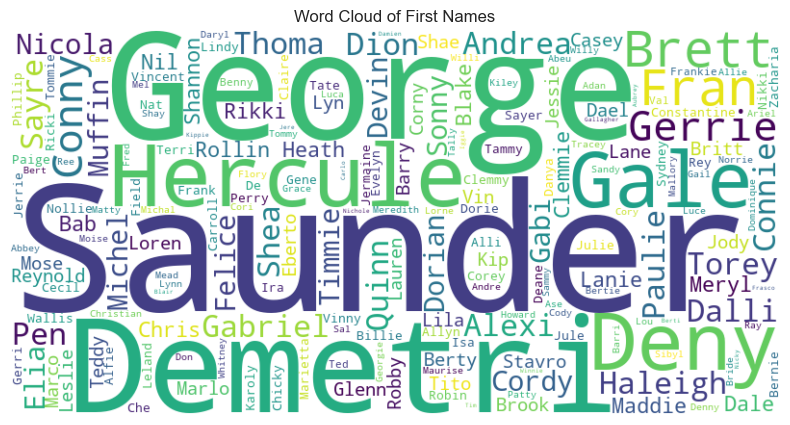

In [13]:
#concatenate all first names into a single string
text = ' '.join(df['First Name'])

#generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of First Names');

**ii. FLIGHT ANALYSIS**

#### Q. Which are the most popular airports where passengers boarded flights?

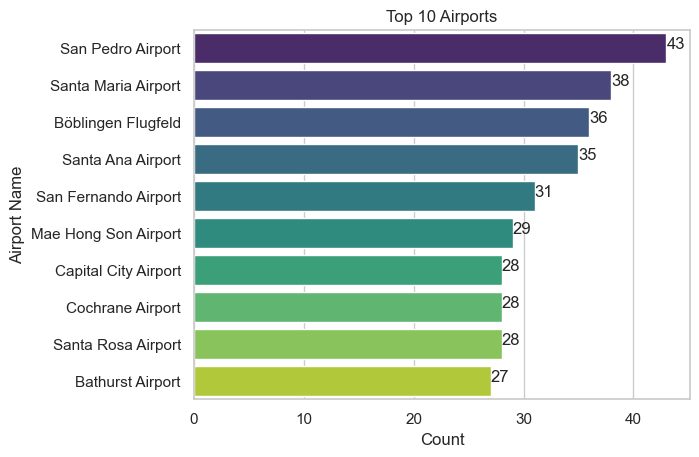

In [14]:
#top 10 airports
top_airports = df['Airport Name'].value_counts().nlargest(10)

#bar plot
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')

#add labels on the bars
for index, value in enumerate(top_airports):
    plt.text(value, index, str(value))
    
plt.ylabel('Airport Name')
plt.xlabel('Count')
plt.title('Top 10 Airports');

#### Q. Which is the most prevailing flight status?

In [15]:
df['Flight Status'].value_counts()

Cancelled    32942
On Time      32846
Delayed      32831
Name: Flight Status, dtype: int64

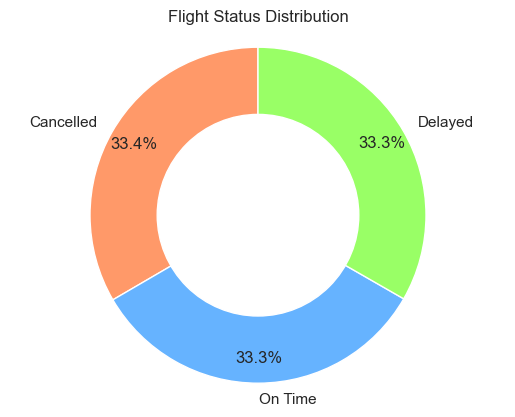

In [16]:
#obtain categorical data
flight_statuses = ['Cancelled', 'On Time', 'Delayed']
count = [32942, 32846,32831]

#define a custom color palette
colors = ['#ff9969', '#66b3ff', '#99ff66']

#create a donut plot
fig, ax = plt.subplots()

#create a pie chart with a white circle in the middle to make it a donut plot
wedges, texts, autotexts = ax.pie(count, labels=flight_statuses, autopct='%1.1f%%', startangle=90, 
                                  pctdistance=0.85, colors=colors)

#draw a white circle at the center
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

#equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Flight Status Distribution");

#### Notes;
There seems to be an amlost equal ratio of flights which were either cancelled, delayed or those which were on time.

#### Q. What is the flight distribution across different continents?

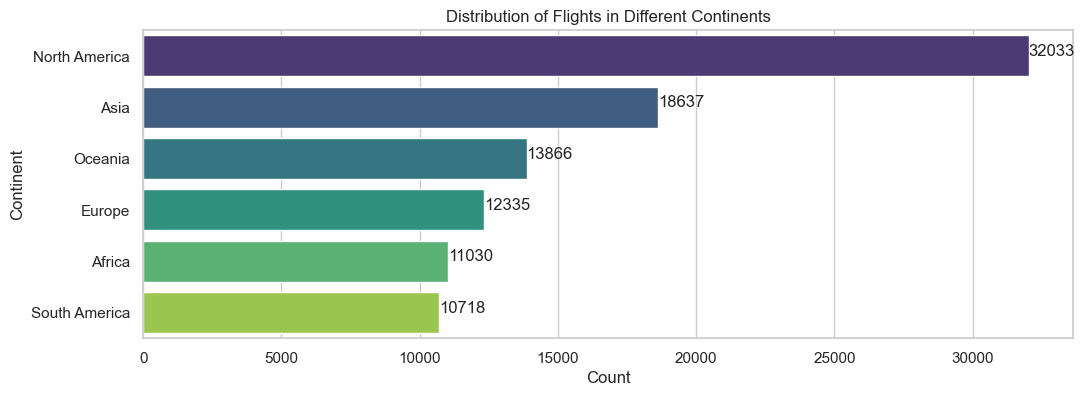

In [17]:
#count for each continent
continent_count = df['Continents'].value_counts()

#bar plot
plt.figure(figsize=(12,4))
sns.barplot(x=continent_count.values, y=continent_count.index
            , palette='viridis')

#add values to each bar
for index, value in enumerate(continent_count):
    plt.text(value , index, str(value))
    
plt.ylabel('Continent')
plt.xlabel('Count')
plt.title('Distribution of Flights in Different Continents');

#### Time series analysis of depature date for flights across different continents.

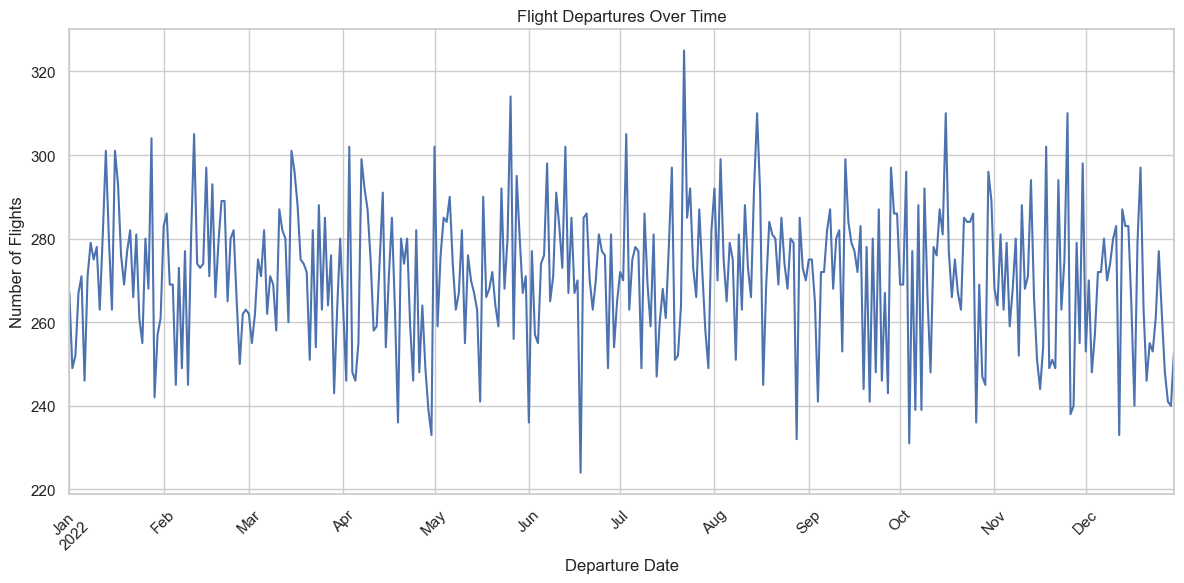

In [26]:
#convert data type
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

#group flights by Departure Date and count the number of flights per day
flight_counts = df.groupby('Departure Date').size()

#create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

#plot the flight departures over time
flight_counts.plot(ax=ax)

#set the x-axis label and rotate the tick labels for better visibility
ax.set_xlabel('Departure Date')
plt.xticks(rotation=45)

#set the y-axis label
ax.set_ylabel('Number of Flights')

#add a title to the plot
plt.title('Flight Departures Over Time')

#show the plot
plt.tight_layout()

#### Notes;
The the months of June to August tend to be the bussiest since they have a high number of flight depatures. This can be attributed to the summer holidays as passangers travel across the world for vacation.

# CONCLUSION:

General Conclusion:

The analysis of the airplane dataset provides valuable insights into various aspects of airline operations and passenger demographics. Here are some key findings:

1. **Gender Ratio:** The dataset reveals that the ratio of male to female passengers is nearly equal. This indicates a balanced representation of both genders in airline travel.

2. **Age Distribution:** The majority of passengers fall within the age range of 7 years to 84 years. This wide age range suggests that people of various age groups use airline services, emphasizing the inclusivity of the industry.

3. **Flight Status:** The dataset shows that there is an almost equal ratio of flights that were either canceled, delayed, or on time. This balance between different flight statuses indicates a certain level of operational efficiency in managing flight schedules.

4. **Peak Travel Months:** The analysis highlights that the months of June to August tend to have a high number of flight departures. This peak in travel can be attributed to the summer holidays, during which passengers travel for vacations and leisure.

Recommendations:

1. **Data Volume:** To gain deeper insights into the aviation industry, it is recommended to collect more data. Expanding the dataset with additional parameters such as flight duration, aircraft type, and passenger class can provide a more comprehensive view of the industry.

2. **Geographic Information:** Incorporating geographic information, such as the origin and destination of flights, can enable the analysis of popular routes, regional preferences, and travel trends.

3. **Crew Performance:** Including crew-related data, such as pilot experience and crew-to-passenger ratios, can help in assessing crew performance and its impact on flight operations and passenger satisfaction.

4. **Safety and Security:** To enhance safety and security analysis, data related to incidents, accidents, and safety measures should be integrated into the dataset. This will allow for a more thorough examination of safety trends and areas for improvement.

5. **Customer Experience:** To optimize the passenger experience, data on passenger feedback, in-flight services, and satisfaction levels should be collected. This can aid in tailoring services to meet passenger expectations.

By expanding and enhancing the dataset with these additional parameters, the aviation industry can gain a more profound understanding of its operations, passenger behavior, and areas for improvement. These insights can lead to data-driven decisions that enhance efficiency, safety, and customer satisfaction within the industry.